

> # RETENCION DE EMPLEADOS
> 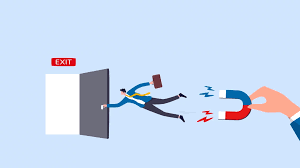

## ABSTRACT

La base de datos proporciona un conjunto de **2064 registros** de empleados y ex empleados de una empresa española, actualizados hasta 2023. Este dataset incluye **31 variables** que describen diversos aspectos como la edad, el abandono, los viajes, el departamento, la distancia desde el hogar, la educación, la carrera, el número de empleados, la satisfacción con el entorno laboral, el sexo, la implicación, el nivel laboral, el puesto, la satisfacción laboral, el estado civil, el salario mensual, el número de empresas anteriores, la edad máxima, las horas extra, el incremento salarial porcentual, la evaluación, la satisfacción con los compañeros, las horas trabajadas por quincena, el nivel de acciones, los años de experiencia, el número de formaciones recibidas el último año, la conciliación, los años en la compañía, los años en el puesto actual, los años desde la última promoción y los años con el manager actual.


Decidí utilizar este dataset debido a la **credibilidad y realismo de los datos**, en contraposición a la abundancia de datasets con datos sintéticos.


El objetivo principal de este conjunto de datos es analizar por qué la **tasa de abandono de empleados** es tan alta y encontrar patrones comunes que puedan explicar este fenómeno. Asimismo, se busca predecir la probabilidad de abandono de futuros empleados si no se realizan cambios. Este proyecto pretende ayudar a la empresa a identificar áreas de mejora que podrían haber pasado desapercibidas, con el fin de optimizar el rendimiento de sus empleados sin recurrir necesariamente al despido o a la búsqueda de nuevos talentos.


*El objetivo concreto es desarrollar un modelo capaz de detectar patrones subyacentes que puedan explicar el abandono de empleados y ex empleados, así como otro modelo que pueda predecir la tasa de abandono de próximos empleados.*

### CARGA DE LIBRERIAS

In [ ]:
#Librerias para

import numpy as np
import pandas as pd

#Librerias para Graficos

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns

#Librerias para APIs

import requests
import json

#Librerias para modelo


### CARGA DE LOS DATOS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('AbandonoEmpleados.csv', sep = ';', index_col= 'id', na_values='#N/D')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,Baja,80,0,8,0,NaN,6,NaN,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,Muy_Alta,80,1,10,3,NaN,10,NaN,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,Media,80,0,7,3,NaN,0,2.0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,Alta,80,0,8,3,NaN,8,3.0,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,Muy_Alta,80,1,6,3,NaN,2,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,Alta,80,1,17,3,NaN,5,4.0,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,Baja,80,1,9,5,NaN,7,NaN,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,Media,80,1,6,0,NaN,6,NaN,0,3


In [ ]:
# Ejecutar cada vez que se reeconecte y cargue de 0 el df
df.drop( columns = ['anos_en_puesto','conciliacion'], inplace = True)
df.drop(columns = 'mayor_edad', inplace = True)
df.drop(columns = ['empleados','sexo','horas_quincena'], inplace = True)
df['educacion'] = df['educacion'].fillna('Universitaria')
df['satisfaccion_trabajo'] = df['satisfaccion_trabajo'].fillna('Alta')
df['implicacion'] = df['implicacion'].fillna('Alta')

---
<br/><br/>

## DATA WRANGLING (CALIDAD Y LIMPIEZA DE DATOS)

### Nombre de Variables

In [ ]:
df.columns

Index(['edad', 'abandono', 'viajes', 'departamento', 'distancia_casa',
       'educacion', 'carrera', 'empleados', 'satisfaccion_entorno', 'sexo',
       'implicacion', 'nivel_laboral', 'puesto', 'satisfaccion_trabajo',
       'estado_civil', 'salario_mes', 'num_empresas_anteriores', 'mayor_edad',
       'horas_extra', 'incremento_salario_porc', 'evaluacion',
       'satisfaccion_companeros', 'horas_quincena', 'nivel_acciones',
       'anos_experiencia', 'num_formaciones_ult_ano', 'conciliacion',
       'anos_compania', 'anos_en_puesto', 'anos_desde_ult_promocion',
       'anos_con_manager_actual'],
      dtype='object')

### Descripcion de Variables

Edad

    edad de empleado
    Variable numérica continua (int).

Abandono

    si actualmente se encuentra fuera de la empresa
    Variable numérica continua (int).

Viajes

    si el empleado viaja y si lo hace con cuanta frecuencia
    Variable numérica continua (int).

Departamento

    en que sector/departamento de la empresa se encuentra
    Variable numérica continua (int).

Distancia casa

    distancia entre trabajo y vivienda en km
    Variable numérica continua (int).

Educacion

    que nivel educativo cuanta
    Variable numérica continua (int).

Carrera

    que carrera ejerce o estudia
    Variable numérica continua (int).

Empleados

    ???
    Variable numérica continua (int).

Satisfaccion entorno

    nivel de satisfaccion en su entorno de trabajo
    Variable numérica continua (int).

Sexo

    sexo/genero
    Variable numérica continua (int).

Implicacion

    el grado en que una persona se identifica psicológicamente con su trabajo
    Variable numérica continua (int).

Nivel laboral

    nivel laboral 1-10
    Variable numérica continua (int).

Puesto

    labor o puesto que desarrolla dentro del departamento
    Variable numérica continua (int).

Satisfaccion trabajo

    nivel de satisfaccion con su trabajo
    Variable numérica continua (int).

Estado civil

    estado civil
    Variable numérica continua (int).

Salario mes

    cantidad remunerada por su trabajo
    Variable numérica continua (int).

Num empresas anteriores

    cantidad de trabajos anteriores al actual
    Variable numérica continua (int).

Mayor edad

    si el individuo es mayor de edad (+18)
    Variable numérica continua (int).

Horas_extra

    el individuo realiza horas extras de trabajo
    Variable numérica continua (int).

Incremento salario porc

    porcentaje de aumento salarial
    Variable numérica continua (int).

Evaluacion

    ???
    Variable numérica continua (int).

Satisfaccion companeros

    nivel de satisfaccion con sus compañeros de trabajo
    Variable numérica continua (int).

Horas quincena

    cantidad de horas de trabajo realizadas por quincena
    Variable numérica continua (int).

Nivel acciones

    ???
    Variable numérica continua (int).

Años experiencia

    cantidad de años de experiencia en la profecion
    Variable numérica continua (int).

Num formaciones ult ano

    cantidad de formaciones realizadas a empleados en el ultimo año
    Variable numérica continua (int).

Conciliacion

    cantidad de conflictos laborales entre un empleado y su empleador solucionadas
    Variable numérica continua (int).

AÑos_compania

    cantidad de años en la compañia
    Variable numérica continua (int).

AÑos en puesto

    cantidad de años en el puesto actual
    Variable numérica continua (int).

AÑos desde ult promocion

    cantidad de años desde la ultima promocion
    Variable numérica continua (int).

AÑos con manager actual

    cantidad de años con el manager actual
    Variable numérica continua (int).



### Vision General

In [ ]:
df.head()

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,Baja,80,0,8,0,NaN,6,NaN,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,Muy_Alta,80,1,10,3,NaN,10,NaN,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,Media,80,0,7,3,NaN,0,2.0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,Alta,80,0,8,3,NaN,8,3.0,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,Muy_Alta,80,1,6,3,NaN,2,NaN,2,2


In [ ]:
df.describe()

,edad,distancia_casa,empleados,sexo,nivel_laboral,salario_mes,num_empresas_anteriores,incremento_salario_porc,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
count,1470.000000,1470.000000,1470.0,1271.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,232.000000,1470.000000,1470.000000
mean,36.923810,9.192517,1.0,2.727773,2.063946,6502.931293,2.693197,15.209524,80.0,0.793878,11.279592,2.799320,7.008163,2.771552,2.187755,4.123129
std,9.135373,8.106864,0.0,0.720788,1.106940,4707.956783,2.498009,3.659938,0.0,0.852077,7.780782,1.289271,6.126525,0.705244,3.222430,3.568136
min,18.000000,1.000000,1.0,1.000000,1.000000,1009.000000,0.000000,11.000000,80.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,30.000000,2.000000,1.0,2.000000,1.000000,2911.000000,1.000000,12.000000,80.0,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,1.0,3.000000,2.000000,4919.000000,2.000000,14.000000,80.0,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,1.0,3.000000,3.000000,8379.000000,4.000000,18.000000,80.0,1.000000,15.000000,3.000000,9.000000,3.000000,3.000000,7.000000
max,60.000000,29.000000,1.0,4.000000,5.000000,19999.000000,9.000000,25.000000,80.0,3.000000,40.000000,6.000000,40.000000,4.000000,15.000000,17.000000


### Tipo de Datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_c

### Limpieza de Datos

#### Valores Nulos

In [ ]:
df.isna().sum().sort_values(ascending = False)

anos_en_puesto              1238
conciliacion                1011
sexo                         199
educacion                    101
satisfaccion_trabajo          76
implicacion                   18
edad                           0
nivel_acciones                 0
evaluacion                     0
satisfaccion_companeros        0
horas_quincena                 0
anos_experiencia               0
horas_extra                    0
num_formaciones_ult_ano        0
anos_compania                  0
anos_desde_ult_promocion       0
incremento_salario_porc        0
salario_mes                    0
mayor_edad                     0
num_empresas_anteriores        0
abandono                       0
estado_civil                   0
puesto                         0
nivel_laboral                  0
satisfaccion_entorno           0
empleados                      0
carrera                        0
distancia_casa                 0
departamento                   0
viajes                         0
anos_con_m

Conclusiones:

*   anos_en_puesto y conciliacion tienen demasiados nulos --> eliminar Variables  (*Solo en caso de que la coorelacion con la variable objetivo sea baja*)
*   sexo, educacion, satisfaccion_trabajo e implicacion --> imputarlos tras EDA

In [ ]:
df.drop( columns = ['anos_en_puesto','conciliacion'], inplace = True)
df.columns

Index(['edad', 'abandono', 'viajes', 'departamento', 'distancia_casa',
       'educacion', 'carrera', 'satisfaccion_entorno', 'implicacion',
       'nivel_laboral', 'puesto', 'satisfaccion_trabajo', 'estado_civil',
       'salario_mes', 'num_empresas_anteriores', 'mayor_edad', 'horas_extra',
       'incremento_salario_porc', 'evaluacion', 'satisfaccion_companeros',
       'nivel_acciones', 'anos_experiencia', 'num_formaciones_ult_ano',
       'anos_compania', 'anos_desde_ult_promocion', 'anos_con_manager_actual'],
      dtype='object')

#### Valores Duplicados

In [ ]:
duplicados = df[df.duplicated()]
if len(duplicados) > 0:
  print('Datos Duplicados:\n', duplicados)
  df= df.drop_duplicates()
  print('Se borraron los datos duplicados')
else:
  print('No hay duplicados en el DataFrame')

No hay duplicados en el DataFrame


#### Valores Atipicos

##### Variables Categorica

In [ ]:
columnas_categoricas = df.select_dtypes(include=['object'])

# umbral para la rareza de las categorías
umbral_rareza = 0.05  # frecuencia menor al 5% es atípica

for columna in columnas_categoricas.columns:

    frecuencia_valores = df[columna].value_counts(normalize=True)
    valores_atipicos = frecuencia_valores[frecuencia_valores < umbral_rareza]

    if not valores_atipicos.empty:

        print(f"Valores atípicos en la columna '{columna}':")
        print(valores_atipicos)
        print()

Valores atípicos en la columna 'departamento':
Human Resources    0.042857
Name: departamento, dtype: float64

Valores atípicos en la columna 'carrera':
Human Resources    0.018367
Name: carrera, dtype: float64

Valores atípicos en la columna 'puesto':
Human Resources    0.035374
Name: puesto, dtype: float64



Si las variables estas tienen una alta coorelacion con el nivel de abandono se tendra en cuanta sacar estos valores a la hora de armar el modelo

##### Variables Numéricas

###### **Desviacion Estandar**

In [ ]:
columnas_numericas = df.select_dtypes(include=['float64', 'int64'])
desviacion_tipica = columnas_numericas.std()
umbral_desviacion = 3

for columna in columnas_numericas.columns:

    media_columna = df[columna].mean()

    limite_inferior = media_columna - umbral_desviacion * desviacion_tipica[columna]
    limite_superior = media_columna + umbral_desviacion * desviacion_tipica[columna]

    # Filtrar valores que están fuera de los límites
    valores_atipicos = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]

    if not valores_atipicos.empty:
        print(f"Valores atípicos en la columna '{columna}':")
        print(valores_atipicos)
        print()

Valores atípicos en la columna 'anos_experiencia':
      edad abandono             viajes            departamento  \
id                                                               
112     56       No      Travel_Rarely  Research & Development   
131     58       No      Travel_Rarely                   Sales   
165     58      Yes      Travel_Rarely  Research & Development   
254     55       No      Travel_Rarely  Research & Development   
374     55       No      Travel_Rarely  Research & Development   
532     56       No  Travel_Frequently                   Sales   
597     55       No      Travel_Rarely                   Sales   
825     58      Yes      Travel_Rarely  Research & Development   
862     53       No      Travel_Rarely                   Sales   
1250    54       No      Travel_Rarely  Research & Development   
1338    56       No      Travel_Rarely         Human Resources   
1472    53       No      Travel_Rarely  Research & Development   
1578    55       No      

###### **Winsorización**

*Técnica que se utiliza para tratar los valores atípicos en variables numéricas. Consiste en reemplazar los valores extremos por valores menos extremos, generalmente los valores que se encuentran en los percentiles especificados.*

 Siempre es recomendable realizar un análisis exploratorio de los datos antes de decidir si la winsorización es adecuada para tu situación específica.

 Se realizara esta de acuerdo al resultado de la coorelacion de variables con el nivel de abandono y se aplicara si es necesario.

 **NO EJECUTAR HASTA ESTAR REALIZADO EL EDA CORRECTAMENTE!**

In [ ]:
from scipy.stats.mstats import winsorize

# Winsorización automática
columna_winsorizada = winsorize(columna, limits=[0.05, 0.05]) # Reemplazar por columnas a las que se aplicaran

###### **Metodo de Colas**

Metodo para reemplazar los valores atípicos con los valores que están en los percentiles extremos de la distribución de datos.

Es importante tener en cuenta que este método también tiene sus limitaciones y debe usarse con cuidado, seleccionando los percentiles extremos de manera apropiada y considerando las implicaciones en la interpretación de los resultados.

Luego de realizar un correcto EDA se valorara su uso.

 **NO EJECUTAR HASTA ESTAR REALIZADO EL EDA CORRECTAMENTE!**

In [ ]:
columnas_numericas = df.select_dtypes(include=[np.number])

# Percentiles extremos para las colas (por ejemplo, percentil 1 y 99)
p1 = df.quantile(0.01)
p99 = df.quantile(0.99)

# Método de las colas
for columna in columnas_numericas.columns:
    df[columna] = np.where(df[columna] < p1[columna], p1[columna], np.where(df[columna] > p99[columna], p99[columna], df[columna])) # Modificar por las columnas que se desee aplicar

---
<br/><br/>

## EDA (Analisis Exploratorio de Datos)

### ANALISIS ESTADISTICO

#### **Analisis de Frecuencias**

*Observar con qué frecuencia ocurren los diferentes valores de esa variable en un conjunto de datos.*

#### VARIABLES CATEGORICAS

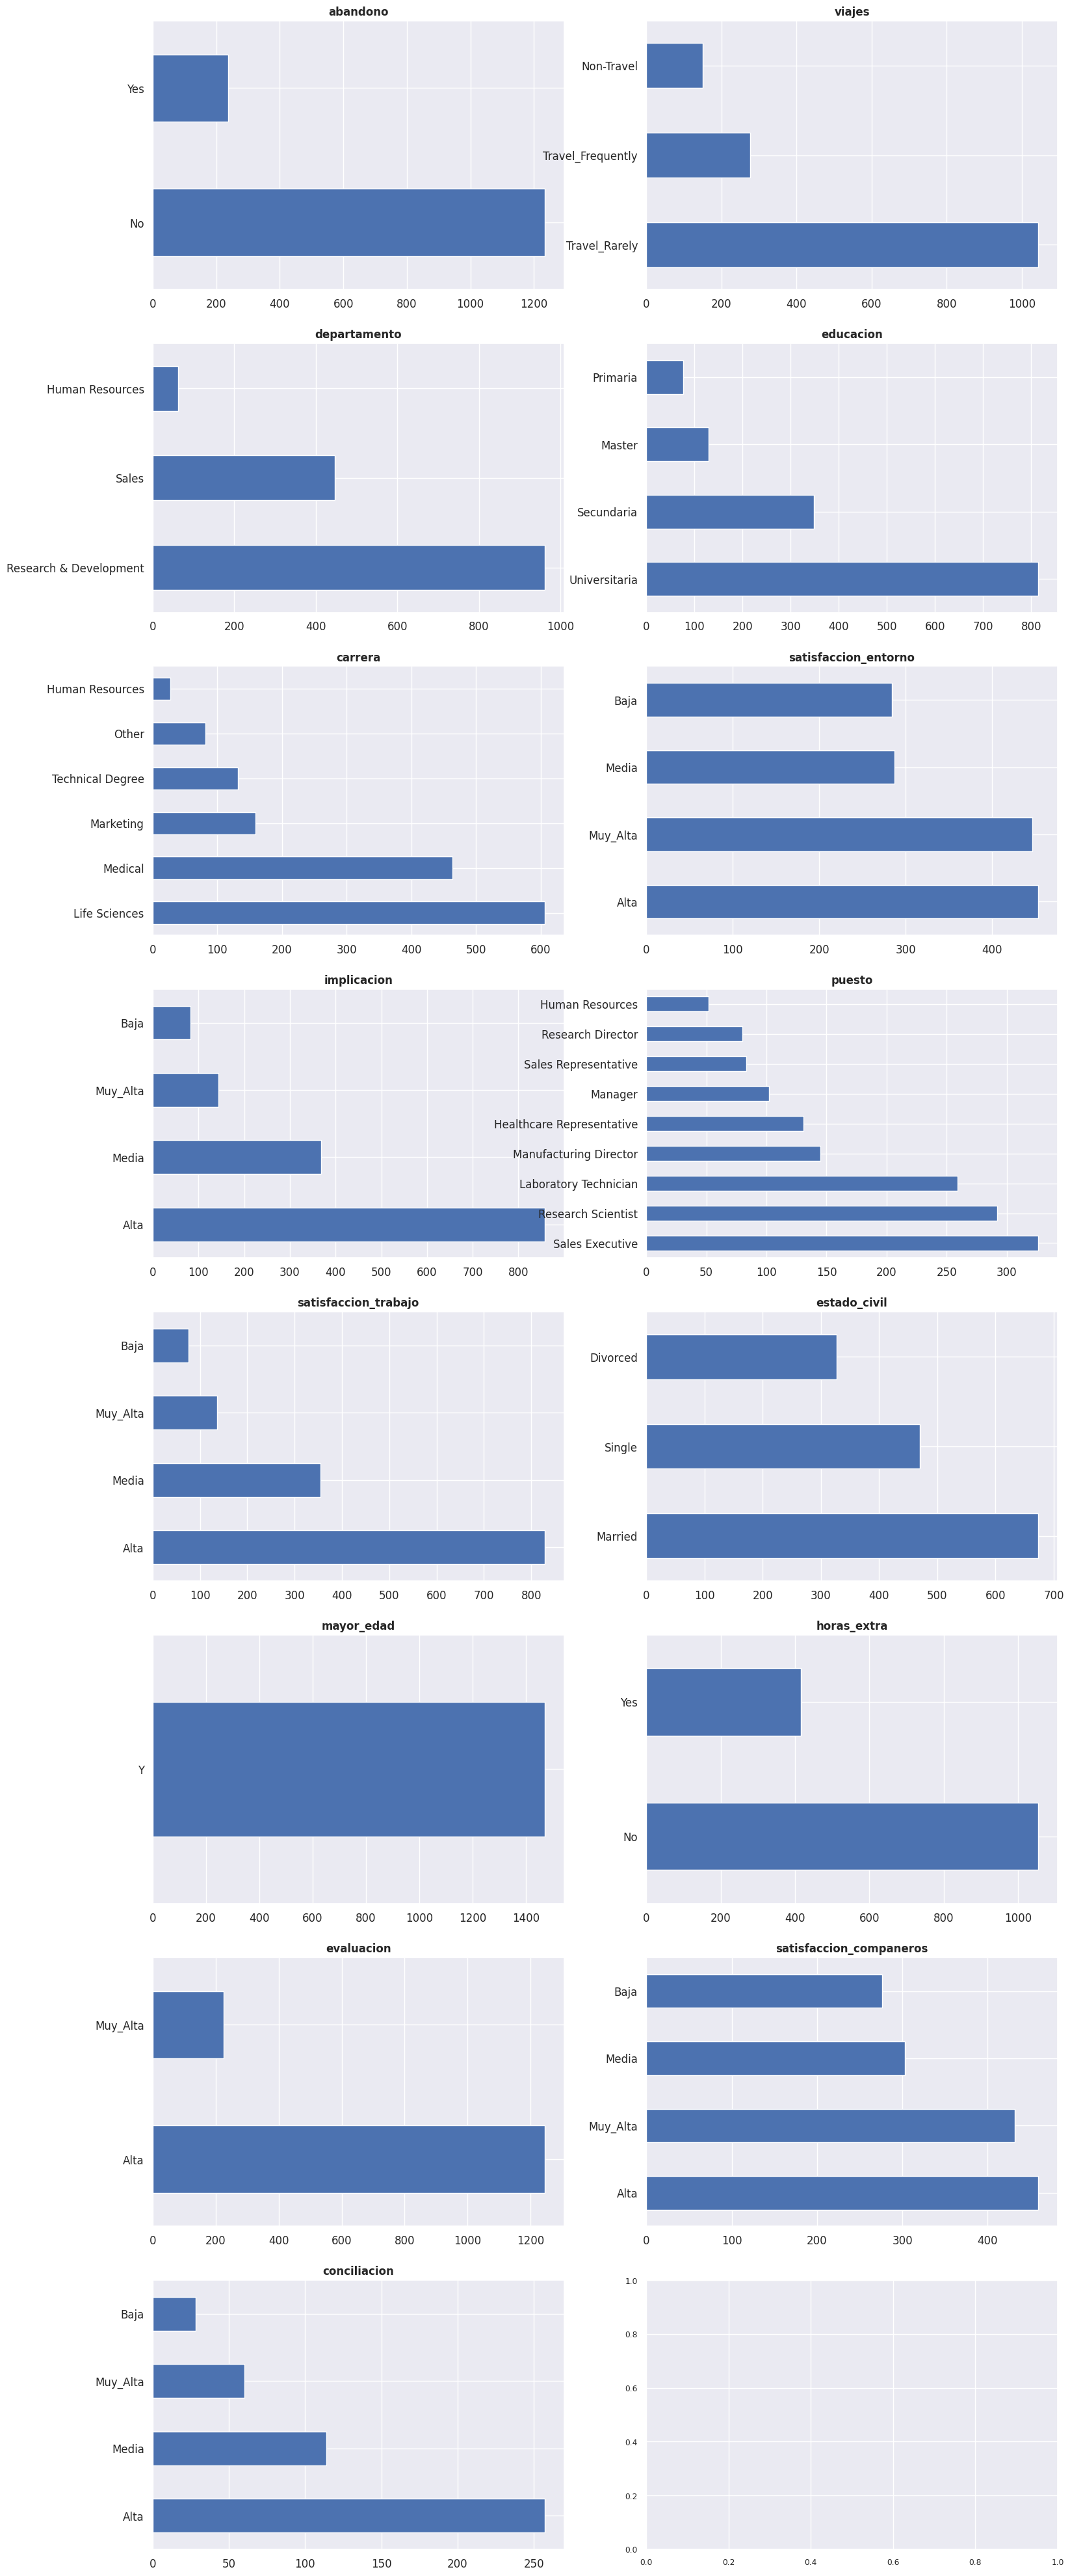

In [ ]:
def graficos_eda_categoricos(cat):

    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

graficos_eda_categoricos(df.select_dtypes('O'))

**Conclusiones:**

*   mayor_edad solo tiene un valor --> eliminarla (una variable con un solo valor no aporta informacion)
*   Sobre las imputaciones pendientes de variables categóricas:
  * educacion (101 valores nulos): imputar por 'Universitaria' (moda)
  * satisfaccion_trabajo (76 valores nulos): imputar por 'Alta'
  * implicacion (18 valores nulos): imputar por 'Alta'

In [ ]:
df.drop(columns = 'mayor_edad', inplace = True)

df['educacion'] = df['educacion'].fillna('Universitaria')

df['satisfaccion_trabajo'] = df['satisfaccion_trabajo'].fillna('Alta')

df['implicacion'] = df['implicacion'].fillna('Alta')

#### VARIABLES NUMÉRICAS

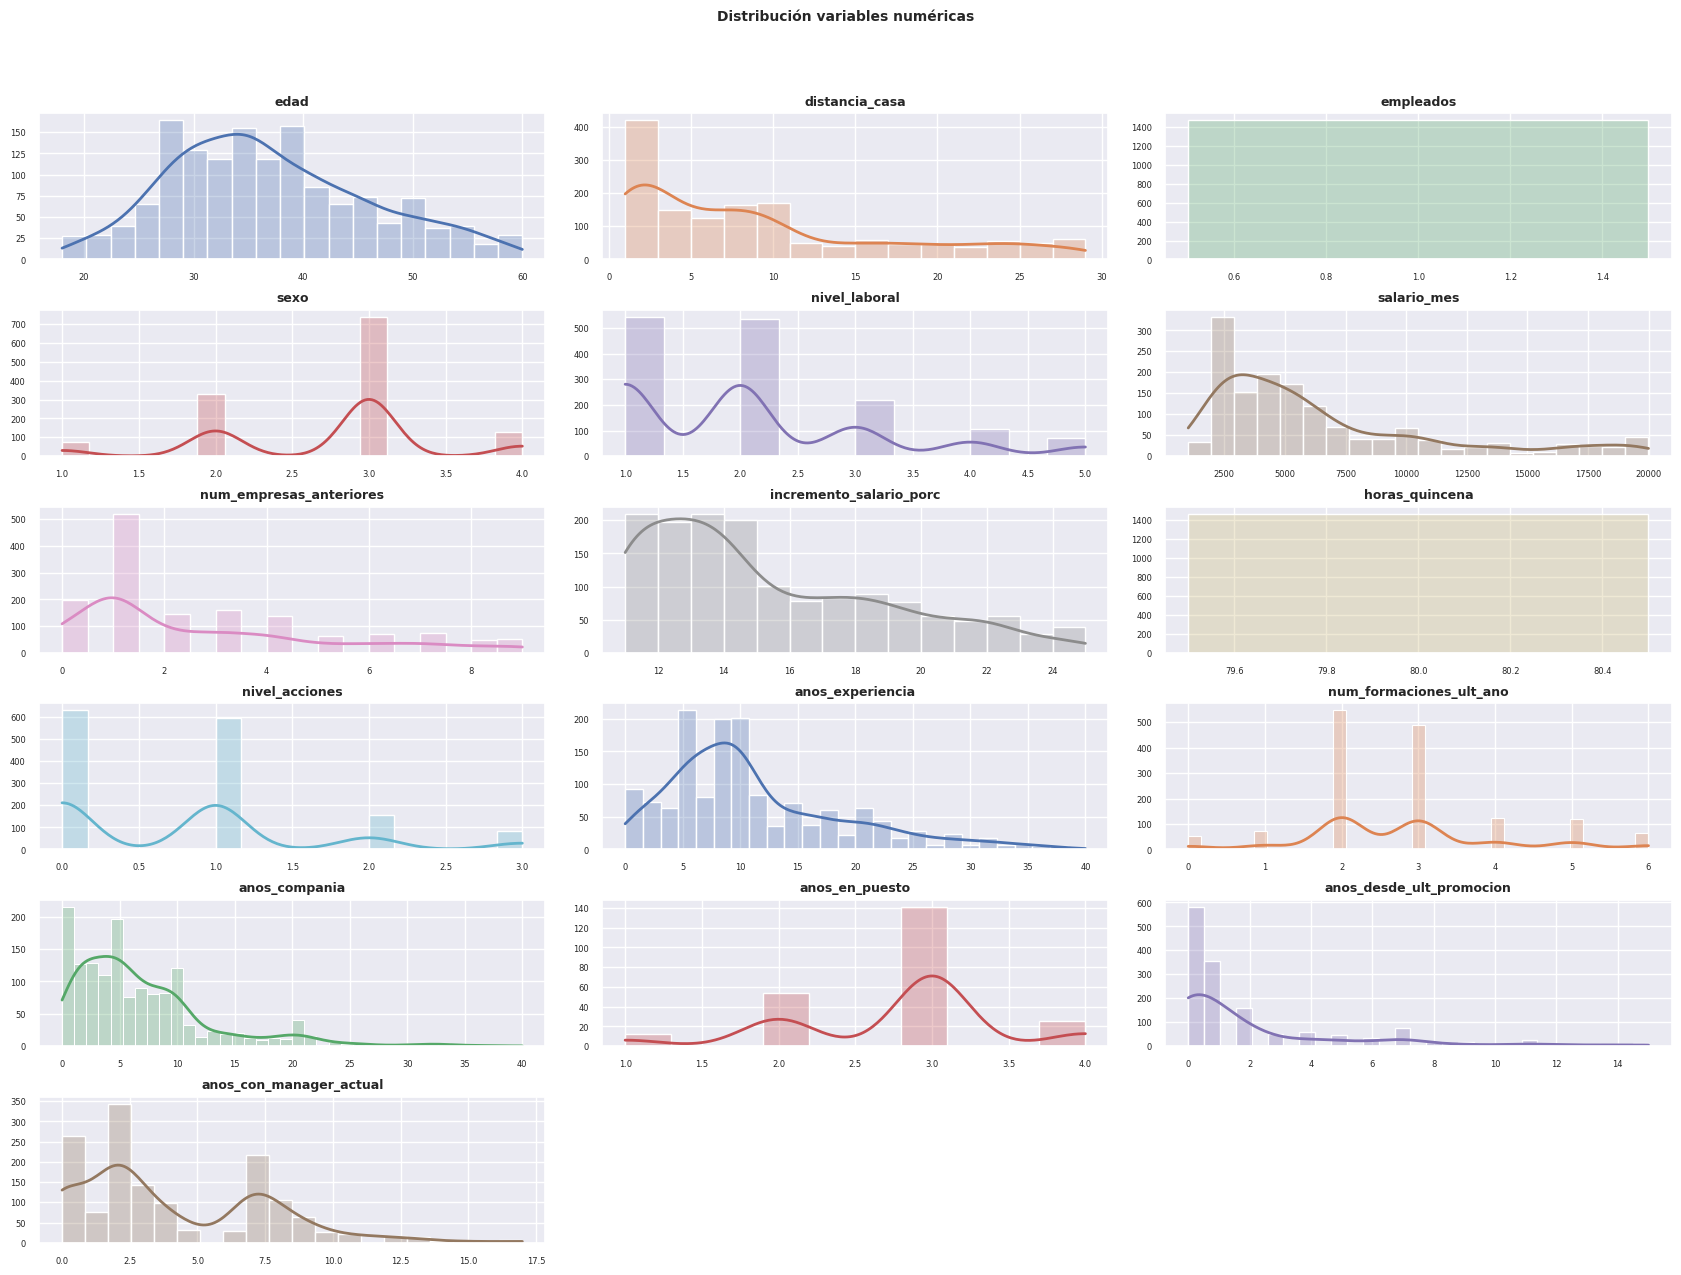

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(17, 13))
axes = axes.flat

columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns

# Obtén la lista de colores del ciclo de propiedades de Matplotlib
colores = [color['color'] for color in plt.rcParams['axes.prop_cycle']]

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = colores[i % len(colores)],  # Usa el operador módulo (%) para asegurarte de que el índice esté dentro del rango válido de la lista de colores
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 9, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Ajusta el diseño y el espacio entre subgráficos
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold")

# Eliminar los ejes que no se están utilizando
num_columnas = len(columnas_numeric)
for i in range(num_columnas, len(axes)):
    fig.delaxes(axes[i])

In [ ]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]

    return(estadisticos)

In [ ]:
estadisticos_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
edad,1470.0,36.923810,36.0,9.135373,18.0,30.0,36.0,43.0,60.0
distancia_casa,1470.0,9.192517,7.0,8.106864,1.0,2.0,7.0,14.0,29.0
empleados,1470.0,1.000000,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
sexo,1271.0,2.727773,3.0,0.720788,1.0,2.0,3.0,3.0,4.0
nivel_laboral,1470.0,2.063946,2.0,1.106940,1.0,1.0,2.0,3.0,5.0
salario_mes,1470.0,6502.931293,4919.0,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
num_empresas_anteriores,1470.0,2.693197,2.0,2.498009,0.0,1.0,2.0,4.0,9.0
incremento_salario_porc,1470.0,15.209524,14.0,3.659938,11.0,12.0,14.0,18.0,25.0
horas_quincena,1470.0,80.000000,80.0,0.000000,80.0,80.0,80.0,80.0,80.0
nivel_acciones,1470.0,0.793878,1.0,0.852077,0.0,0.0,1.0,1.0,3.0


Conclusiones:

* Empleados solo tiene un valor --> Eliminarla
* Sexo tiene 4 valores y estos no especifican a que hacen referencia--> Eliminarla o pedir retroalimentacion a la hora de entregar proyecto
* Horas quincena solo tiene una valor --> Eliminarla
* De los nulos pendientes de imputación que sean numéricas solo está el sexo, pero como la vamos a eliminar ya no hay que imputar nada

In [ ]:
df.drop(columns = ['empleados','sexo','horas_quincena'], inplace = True)
df.columns

Index(['edad', 'abandono', 'viajes', 'departamento', 'distancia_casa',
       'educacion', 'carrera', 'satisfaccion_entorno', 'implicacion',
       'nivel_laboral', 'puesto', 'satisfaccion_trabajo', 'estado_civil',
       'salario_mes', 'num_empresas_anteriores', 'mayor_edad', 'horas_extra',
       'incremento_salario_porc', 'evaluacion', 'satisfaccion_companeros',
       'nivel_acciones', 'anos_experiencia', 'num_formaciones_ult_ano',
       'conciliacion', 'anos_compania', 'anos_en_puesto',
       'anos_desde_ult_promocion', 'anos_con_manager_actual'],
      dtype='object')

### **MULITIVARIATE ANALYTICS**

Como nuestro objetivo es analizar el nivel de desempleo se necesitara comparar esta variable con las otras y ver cual es su coorelacion.


#### Coorelacion de variables coonciliacion y años en puesto

In [ ]:
def coorelacon(df):
      df_map = df.copy()

      df_map['abandono'] = df['abandono'].map({'Yes': 1, 'No': 0})
      df_map['conciliacion'] = df['conciliacion'].map({'Baja': 0, 'Muy_Alta': 3, 'Media': 1, 'Alta': 2})

      correlation_conciliacion = df_map['abandono'].corr(df_map['conciliacion'], method='pearson')  # Cambia 'pearson' por 'spearman' o 'kendall' según sea necesario
      print("Correlación entre 'abandono' y 'conciliacion':", correlation_conciliacion)

      correlation_años_en_puesto = df_map['abandono'].corr(df_map['anos_en_puesto'], method='pearson')  # Cambia 'pearson' por 'spearman' o 'kendall' según sea necesario
      print("Correlación entre 'abandono' y 'anos_en_puesto':", correlation_años_en_puesto)

In [ ]:
coorelacon(df)

Correlación entre 'abandono' y 'conciliacion': -0.13644592996869545
Correlación entre 'abandono' y 'anos_en_puesto': -0.21892796314269253


Correlación entre 'abandono' y 'conciliacion': -0.1364

*   Esta correlación es negativa y cercana a cero. Indica una relación débil entre 'abandono' y 'conciliacion'. La correlación negativa sugiere que a medida que el valor de 'conciliacion' aumenta, es más probable que el valor de 'abandono' disminuya, y viceversa. Sin embargo, la correlación cercana a cero indica que la relación es débil.

Correlación entre 'abandono' y 'anos_en_puesto': -0.2189

*   Esta correlación también es negativa y más cercana a -0.22. Al igual que antes, indica una relación débil entre 'abandono' y 'anos_en_puesto'. La correlación negativa sugiere que a medida que el número de 'anos_en_puesto' aumenta, es menos probable que un empleado abandone, y viceversa, pero nuevamente, la correlación cercana a cero sugiere que esta relación es débil.

In [ ]:
def plot_heatmap(df):

    df_map = df.copy()

    df_map['abandono'] = df['abandono'].map({'Yes': 1, 'No': 0})
    df_map['conciliacion'] = df['conciliacion'].map({'Baja': 0, 'Muy_Alta': 3, 'Media': 1, 'Alta': 2})

    plt.figure(figsize=(10, 8))
    heatmap = sns.heatmap(df_map.corr(), annot=True, annot_kws={"size": 8})
    sns.set(font_scale=0.8)
    plt.title("Heatmap de Correlación")

    return heatmap

<ipython-input-47-cafb5cf4a5a9>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df_map.corr(), annot=True, annot_kws={"size": 8})


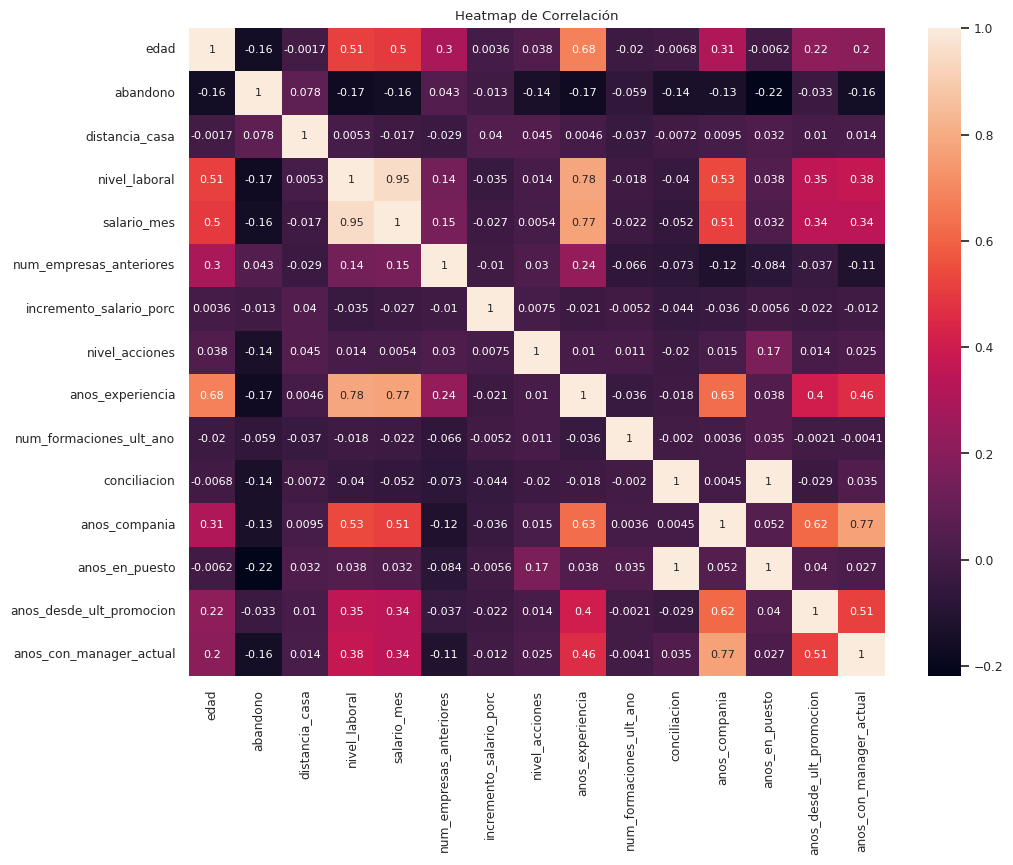

In [ ]:
heatmap = plot_heatmap(df)
plt.show()

In [ ]:
# Calculo de Coheficiente de Correlacion de las columnas
def coor_num():
    columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
    df_map = df.copy()

    df_map['abandono'] = df['abandono'].map({'Yes': 1, 'No': 0})

    for columna in columnas_numeric:
        coef_corr = df_map['abandono'].corr(df[columna])
        fuerza = ''

        if abs(coef_corr) < 0.20:
            fuerza = 'Muy débil'
        elif 0.20 <= abs(coef_corr) < 0.40:
            fuerza = 'Débil'
        elif 0.40 <= abs(coef_corr) < 0.60:
            fuerza = 'Moderada'
        elif 0.60 <= abs(coef_corr) < 0.80:
            fuerza = 'Fuerte'
        elif 0.80 <= abs(coef_corr) <= 1.0:
            fuerza = 'Muy fuerte'


        print(f"Coeficiente de correlación entre 'precio' y '{columna}': {coef_corr:.4f} ({fuerza})")

In [ ]:
coor_num()

Coeficiente de correlación entre 'precio' y 'edad': -0.1592 (Muy débil)
Coeficiente de correlación entre 'precio' y 'distancia_casa': 0.0779 (Muy débil)
Coeficiente de correlación entre 'precio' y 'nivel_laboral': -0.1691 (Muy débil)
Coeficiente de correlación entre 'precio' y 'salario_mes': -0.1598 (Muy débil)
Coeficiente de correlación entre 'precio' y 'num_empresas_anteriores': 0.0435 (Muy débil)
Coeficiente de correlación entre 'precio' y 'incremento_salario_porc': -0.0135 (Muy débil)
Coeficiente de correlación entre 'precio' y 'nivel_acciones': -0.1371 (Muy débil)
Coeficiente de correlación entre 'precio' y 'anos_experiencia': -0.1711 (Muy débil)
Coeficiente de correlación entre 'precio' y 'num_formaciones_ult_ano': -0.0595 (Muy débil)
Coeficiente de correlación entre 'precio' y 'anos_compania': -0.1344 (Muy débil)
Coeficiente de correlación entre 'precio' y 'anos_en_puesto': -0.2189 (Débil)
Coeficiente de correlación entre 'precio' y 'anos_desde_ult_promocion': -0.0330 (Muy débil

**Conclusiones:**

* anos_en_puesto y conciliacion tienen demasiados nulos y su coorelacion con la variable objetivo es muy baja --> eliminar Variables


#### Correlación entre variables categóricas y la variable objetivo 'abandono'

---
<br/><br/>

## INFERENCIA ESTADISTICA Y GENERACION DE INSIGTHS

### Establecer Hipotesis, Preguntas y Verificar condiciones



*   **Cuantificación del problema: ¿Cual es la tasa de abandono?**




In [ ]:
df.abandono.value_counts(normalize = True) * 100

No     83.877551
Yes    16.122449
Name: abandono, dtype: float64

La empresa cuenta con una tasa de abandono de un 16.1%

*   **¿Hay un perfil tipo de empleado que deja la empresa?**

In [ ]:
df['abandono'] = df['abandono'].map({'No': 0, 'Yes': 1})

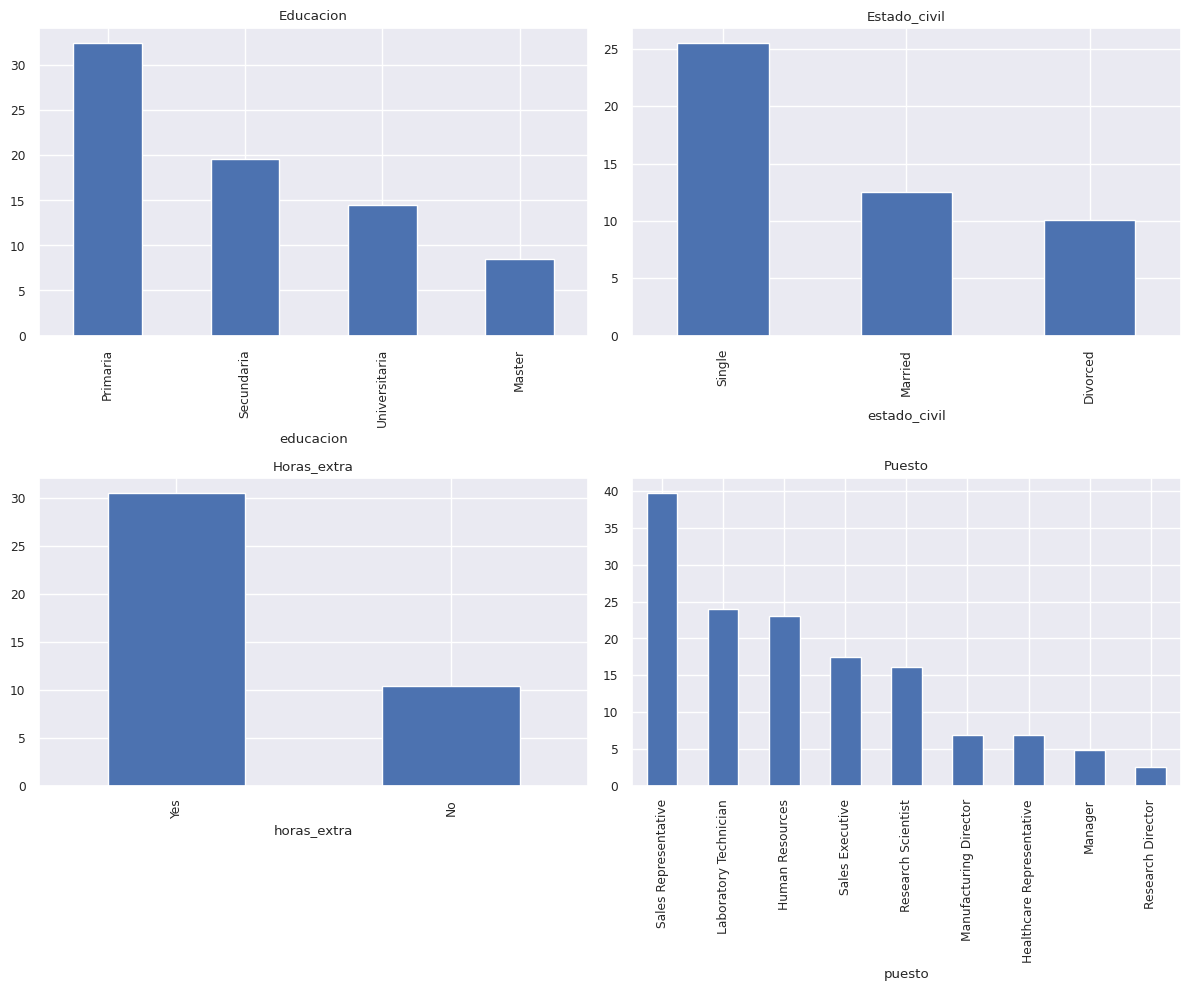

In [ ]:
columns_of_interest = ['educacion', 'estado_civil', 'horas_extra', 'puesto']

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for i, column in enumerate(columns_of_interest):
    row = i // 2
    col = i % 2
    temp = df.groupby(column).abandono.mean().sort_values(ascending=False) * 100
    temp.plot.bar(ax=axs[row, col])
    axs[row, col].set_title(column.capitalize())

plt.tight_layout()
plt.show()

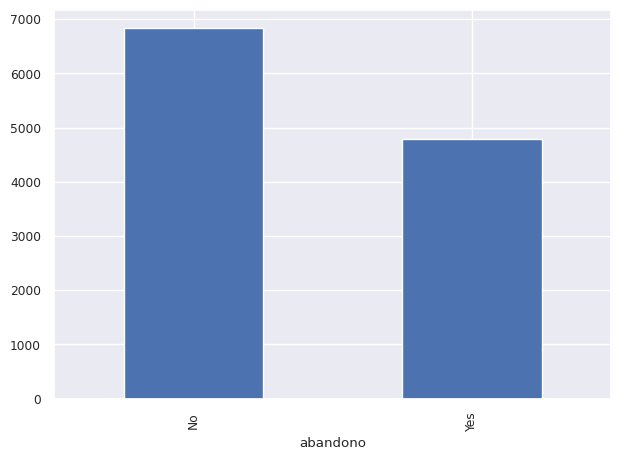

In [ ]:
temp = df.groupby('abandono').salario_mes.mean()
temp.plot.bar();

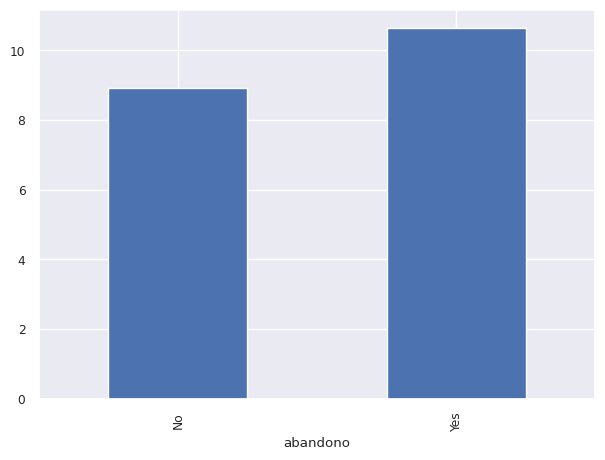

In [ ]:
temp = df.groupby('abandono').distancia_casa.mean()
temp.plot.bar();

**Conclusiones:**

El perfil medio del empleado que deja la empresa es:

* Bajo nivel educativo
* Soltero
* Trabaja en ventas
* Bajo salario
* Alta carga de horas extras
* Mayor distancia del hogar a la empresa

### BUISSNES ANALYTICS


*   **¿Cual es el impacto económico de este problema?**




Según el estudio "Cost of Turnover" del Center for American Progress:

* El coste de la fuga de los empleados que ganan menos de 30000 es del 16,1% de su salario

* El coste de la fuga de los empleados que ganan entre 30000-50000 es del 19,7% de su salario

* El coste de la fuga de los empleados que ganan entre 50000-75000 es del 20,4% de su salario

* El coste de la fuga de los empleados que ganan más de 75000 es del 21% de su salario

In [ ]:
# Creamos una nueva variable salario_ano del empleado
df['salario_ano'] = df.salario_mes.transform(lambda x: x*12)
df[['salario_mes','salario_ano']]

,salario_mes,salario_ano
id,,
1,5993,71916
2,5130,61560
4,2090,25080
5,2909,34908
7,3468,41616
...,...,...
2061,2571,30852
2062,9991,119892
2064,6142,73704


In [ ]:
# Calculamos el impacto económico de cada empleado si deja la empresa

#Lista de condiciones
condiciones = [(df['salario_ano'] <= 30000),
               (df['salario_ano'] > 30000) & (df['salario_ano'] <= 50000),
               (df['salario_ano'] > 50000) & (df['salario_ano'] <= 75000),
               (df['salario_ano'] > 75000)]

#Lista de resultados
resultados = [df.salario_ano * 0.161, df.salario_ano * 0.197, df.salario_ano * 0.204, df.salario_ano * 0.21]

#Aplicamos select
df['impacto_abandono'] = np.select(condiciones,resultados, default = -999)

df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Alta,Baja,0,8,0,6,0,5,71916,14670.864
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,Muy_Alta,1,10,3,10,1,7,61560,12558.240
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Alta,Media,0,7,3,0,0,0,25080,4037.880
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,Alta,0,8,3,8,3,0,34908,6876.876
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Alta,Muy_Alta,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,Alta,1,17,3,5,0,3,30852,6077.844
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Alta,Baja,1,9,5,7,1,7,119892,25177.320
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Muy_Alta,Media,1,6,0,6,0,3,73704,15035.616


*   **¿Cúanto nos ha costado este problema en el último año?**

In [ ]:
coste_total =  df.loc[df.abandono == 1].impacto_abandono.sum()
print('El problema ha costado un total de ', coste_total, '€ este año')

El problema ha costado un total de  2719005.912 € este año


*   **¿Cuanto nos cuesta que los empleados no estén motivados? (pérdidas en implicación == Baja)**

In [ ]:
motivacion = df.loc[(df.abandono == 1) & (df.implicacion == 'Baja')].impacto_abandono.sum()
print('Lo que nos cuersta que lo empleados no esten motivados es de ', motivacion, '€')

Lo que nos cuersta que lo empleados no esten motivados es de  368672.688 €


*   **¿Cuanto dinero podríamos ahorrar fidelizando mejor a nuestros empleados?**

In [ ]:
print(f"Reducir un 10% la fuga de empleados nos ahorraría {int(coste_total * 0.1)} € cada año.")

print(f"Reducir un 20% la fuga de empleados nos ahorraría {int(coste_total * 0.2)} € cada año.")

print(f"Reducir un 30% la fuga de empleados nos ahorraría {int(coste_total * 0.3)} € cada año.")

Reducir un 10% la fuga de empleados nos ahorraría 271900€ cada año.
Reducir un 20% la fuga de empleados nos ahorraría 543801€ cada año.
Reducir un 30% la fuga de empleados nos ahorraría 815701€ cada año.


### Y podemos seguir trazando estrategias asociadas a los insights de abandono:

Habíamos visto que los representantes de ventas son el puesto que más se van. ¿Tendría sentido hacer un plan específico para ellos? ¿Cual sería el coste ahorrado si disminuimos la fuga un 30%?

Primero vamos a calcular el % de representantes de ventas que se han ido el año pasado

In [ ]:
total_repre_pasado = len(df.loc[df.puesto == 'Sales Representative'])
abandonos_repre_pasado = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 1)])
porc_pasado = abandonos_repre_pasado / total_repre_pasado

porc_pasado

0.39759036144578314

Ahora vamos a estimar cuántos se nos irán este año

In [ ]:
total_repre_actual = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0)])
se_iran = int(total_repre_actual * porc_pasado)

se_iran

19

Sobre ellos cuantos podemos retener (hipótesis 30%) y cuanto dinero puede suponer

In [ ]:
retenemos = int(se_iran * 0.3)

ahorramos = df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0),'impacto_abandono'].sum() * porc_pasado * 0.3

print(f'Podemos retener {retenemos} representantes de ventas y ello supondría ahorrar {ahorramos}$.')

Podemos retener 5 representantes de ventas y ello supondría ahorrar 37447.22424578312$.


Este dato también es muy interesante porque nos permite determinar el presupuesto para acciones de retención por departamento o perfil.

Ya que sabemos que podemos gastarnos hasta 37.000$ sólo en acciones específicas para retener a representantes de ventas y se estarían pagando sólas con la pérdida evitada

---
<br/><br/>

## MODELO DE MACHINE LEARNING

In [ ]:
df_ml = df.copy()

In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   int64  
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1470 non-null   object 
 6   carrera                   1470 non-null   object 
 7   satisfaccion_entorno      1470 non-null   object 
 8   implicacion               1470 non-null   object 
 9   nivel_laboral             1470 non-null   int64  
 10  puesto                    1470 non-null   object 
 11  satisfaccion_trabajo      1470 non-null   object 
 12  estado_civil              1470 non-null   object 
 13  salario_mes               1470 non-null   int64  
 14  num_empr

### PREPARACIÓN DE LOS DATOS PARA LA MODELIZACIÓN

#### Transformar todas las variables categóricas a númericas

In [ ]:
from sklearn.preprocessing import OneHotEncoder

#Categóricas
cat = df_ml.select_dtypes('O')

#Instanciamos
ohe = OneHotEncoder(sparse = False)

#Entrenamos
ohe.fit(cat)

#Aplicamos
cat_ohe = ohe.transform(cat)

#Ponemos los nombres
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
cat_ohe

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,estado_civil_Married,estado_civil_Single,horas_extra_No,horas_extra_Yes,evaluacion_Alta,evaluacion_Muy_Alta,satisfaccion_companeros_Alta,satisfaccion_companeros_Baja,satisfaccion_companeros_Media,satisfaccion_companeros_Muy_Alta
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


#### Dataframe final

Seleccionamos las variables numéricas para poder juntarlas a las cat_hoe

In [ ]:
num = df.select_dtypes('number').reset_index(drop = True)

Las juntamos todas en el dataframe final

In [ ]:
df_ml = pd.concat([cat_ohe,num], axis = 1)
df_ml

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,num_empresas_anteriores,incremento_salario_porc,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,8,11,0,8,0,6,0,5,71916,14670.864
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,23,1,10,3,10,1,7,61560,12558.240
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,6,15,0,7,3,0,0,0,25080,4037.880
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,11,0,8,3,8,3,0,34908,6876.876
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,9,12,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,4,17,1,17,3,5,0,3,30852,6077.844
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,4,15,1,9,5,7,1,7,119892,25177.320
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,20,1,6,0,6,0,3,73704,15035.616
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2,14,0,17,3,9,0,8,64680,13194.720


### DISEÑO DE LA MODELIZACIÓN

#### Separación predictoras y target

In [ ]:
x = df_ml.drop(columns='abandono')
y = df_ml['abandono']

#### Separación train y test

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3)

### ENTRENAMIENTO DEL MODELO SOBRE TRAIN

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Instanciar
ac = DecisionTreeClassifier(max_depth=4)

#Entrenar
ac.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=4)

### PREDICCIÓN Y VALIDACIÓN SOBRE TEST

In [ ]:
# Predicción
pred = ac.predict_proba(test_x)[:, 1]
pred[:20]

array([0.06445312, 0.05714286, 0.05714286, 0.08602151, 0.06445312,
       0.        , 0.06445312, 0.33333333, 0.06445312, 0.05714286,
       0.05714286, 0.06445312, 0.06445312, 0.05714286, 0.33333333,
       0.06445312, 0.06445312, 0.05714286, 0.56140351, 0.05882353])

In [ ]:
# Evaluación
from sklearn.metrics import roc_auc_score

roc_auc_score(test_y,pred)

0.6781540119363395

### INTERPRETACIÓN

#### Diagrama del árbol

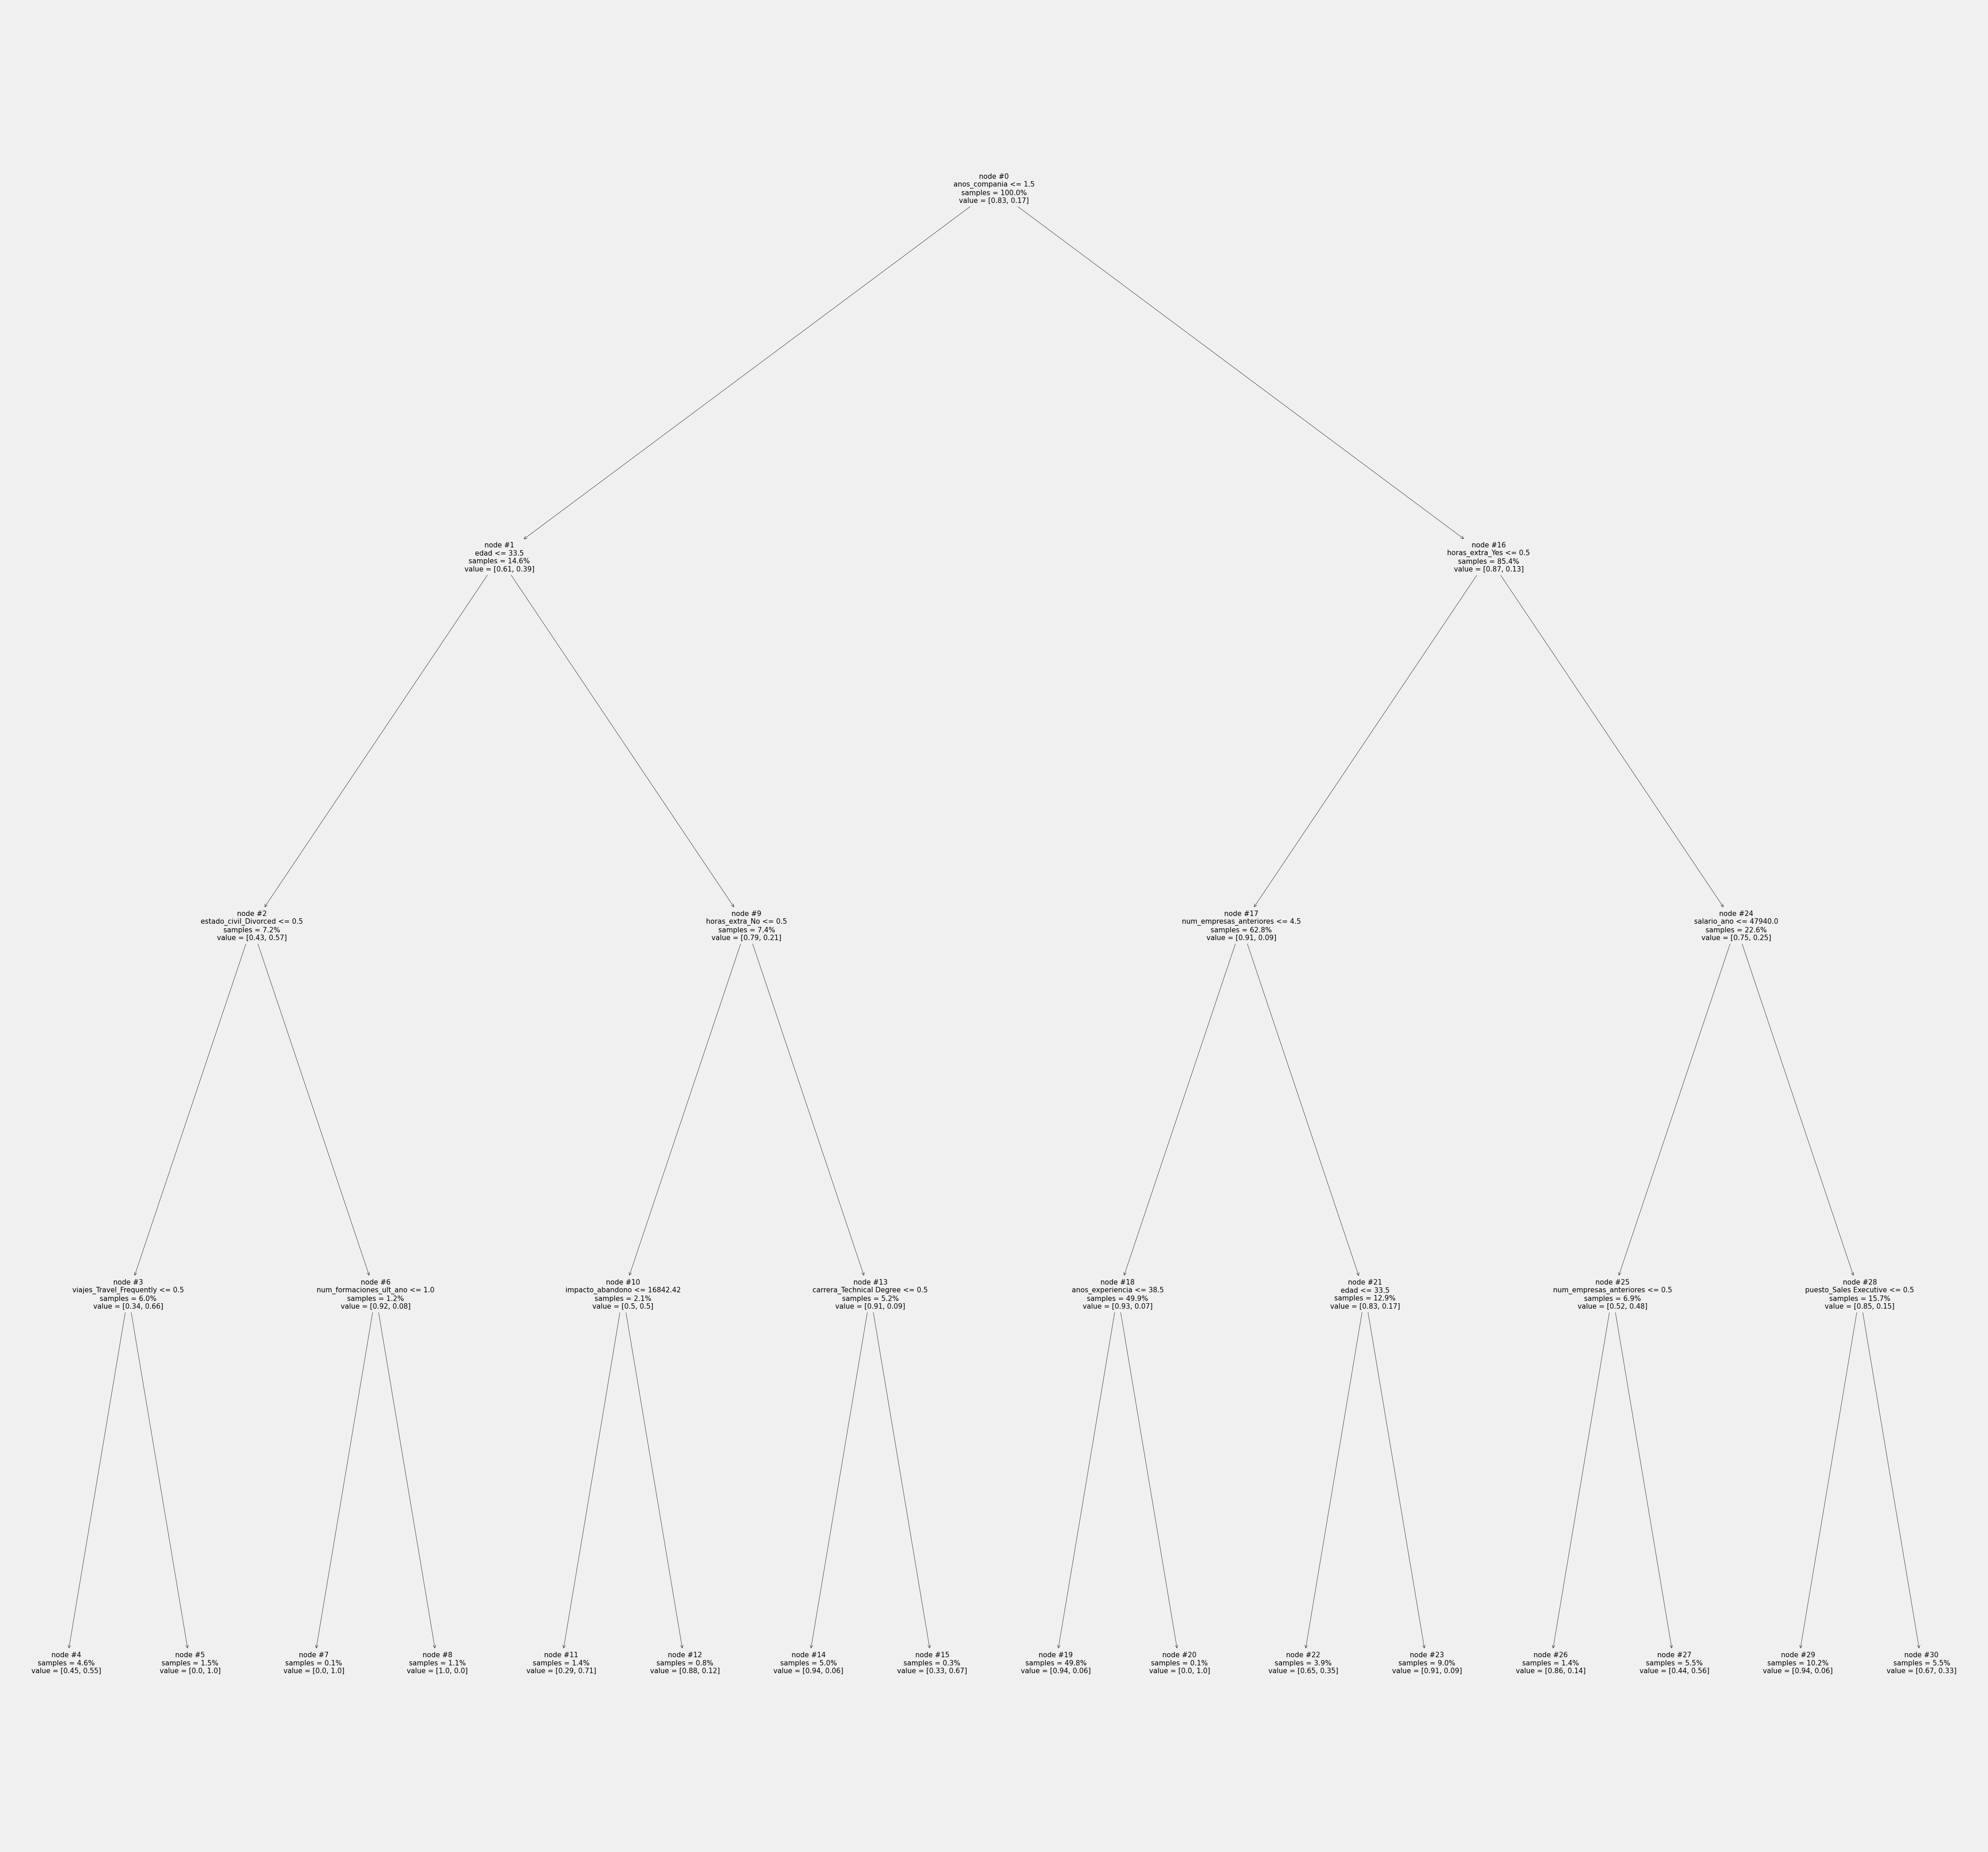

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize = (50,50))

plot_tree(ac,
          feature_names= test_x.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2);

#### Importancia de las variables

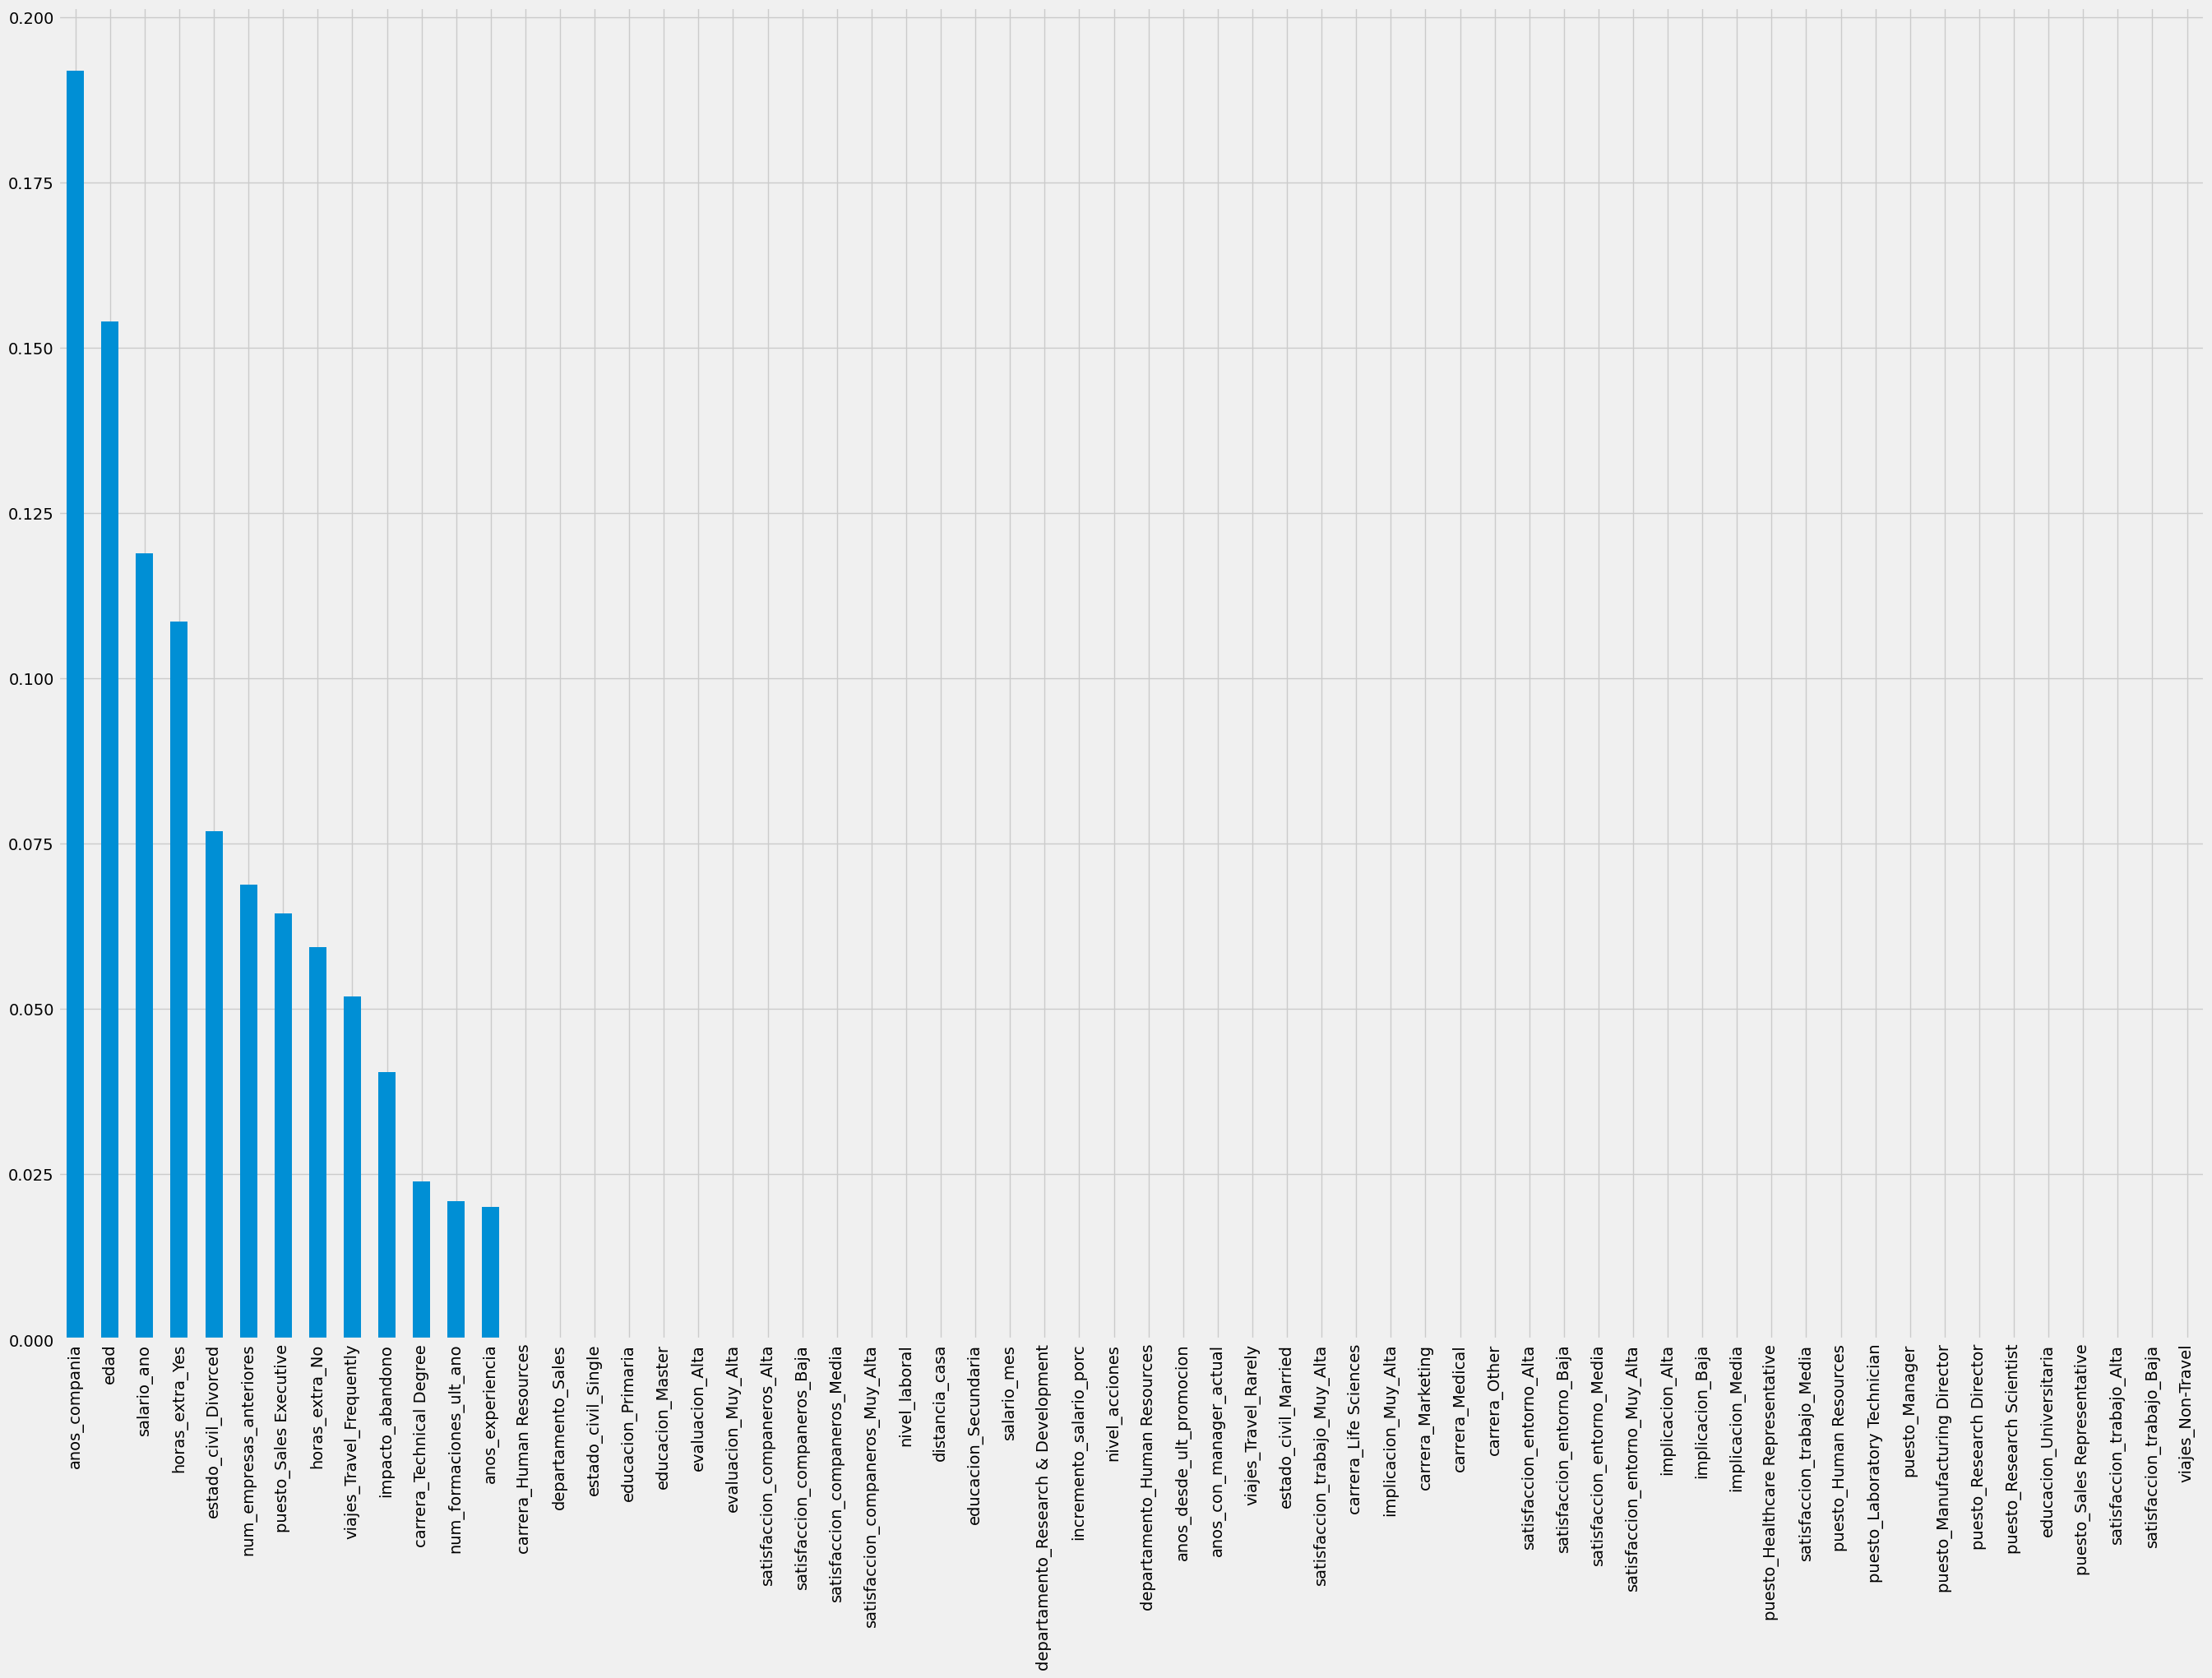

In [ ]:
pd.Series(ac.feature_importances_,index = test_x.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (30,20));

### EXPLOTACIÓN

Incoporación del scoring al dataframe principal

In [ ]:
df['scoring_abandono'] = ac.predict_proba(df_ml.drop(columns = 'abandono'))[:, 1]
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Baja,0,8,0,6,0,5,71916,14670.864,0.333333
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,1,10,3,10,1,7,61560,12558.240,0.064453
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,7,3,0,0,0,25080,4037.880,0.714286
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,0,8,3,8,3,0,34908,6876.876,0.561404
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Muy_Alta,1,6,3,2,2,2,41616,8198.352,0.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,1,17,3,5,0,3,30852,6077.844,0.064453
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Baja,1,9,5,7,1,7,119892,25177.320,0.064453
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Media,1,6,0,6,0,3,73704,15035.616,0.057143


Ejemplo de los 10 empleados con mayor probabilidad de dejar la empresa

In [ ]:
df.sort_values(by = 'scoring_abandono', ascending = False)[0:10]

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1624,18,1,Travel_Frequently,Sales,3,Universitaria,Medical,Media,Alta,1,...,Alta,0,0,2,0,0,0,18828,3031.308,1.0
165,58,1,Travel_Rarely,Research & Development,23,Universitaria,Medical,Muy_Alta,Alta,3,...,Muy_Alta,1,40,3,40,15,6,123744,25986.240,1.0
1107,26,1,Travel_Rarely,Research & Development,21,Universitaria,Medical,Baja,Alta,1,...,Alta,1,1,0,1,0,0,28524,4592.364,1.0
1853,32,0,Travel_Frequently,Sales,10,Universitaria,Marketing,Muy_Alta,Alta,2,...,Alta,0,4,2,0,0,0,55776,11378.304,1.0
587,31,1,Travel_Frequently,Research & Development,20,Universitaria,Life Sciences,Baja,Alta,3,...,Baja,0,12,2,1,0,0,117888,24756.480,1.0
514,30,1,Travel_Frequently,Research & Development,4,Universitaria,Technical Degree,Alta,Alta,1,...,Alta,0,3,4,1,0,0,27420,4414.620,1.0
235,19,1,Travel_Frequently,Sales,1,Primaria,Technical Degree,Alta,Baja,1,...,Baja,0,1,5,0,0,0,27900,4491.900,1.0
614,18,1,Travel_Frequently,Sales,5,Universitaria,Marketing,Media,Alta,1,...,Muy_Alta,0,0,3,0,0,0,22536,3628.296,1.0
1203,22,1,Travel_Frequently,Research & Development,3,Secundaria,Life Sciences,Alta,Media,1,...,Media,1,1,5,0,0,0,34236,6744.492,1.0


Ejemplo: riesgo de dejar la empresa por puesto de trabajo

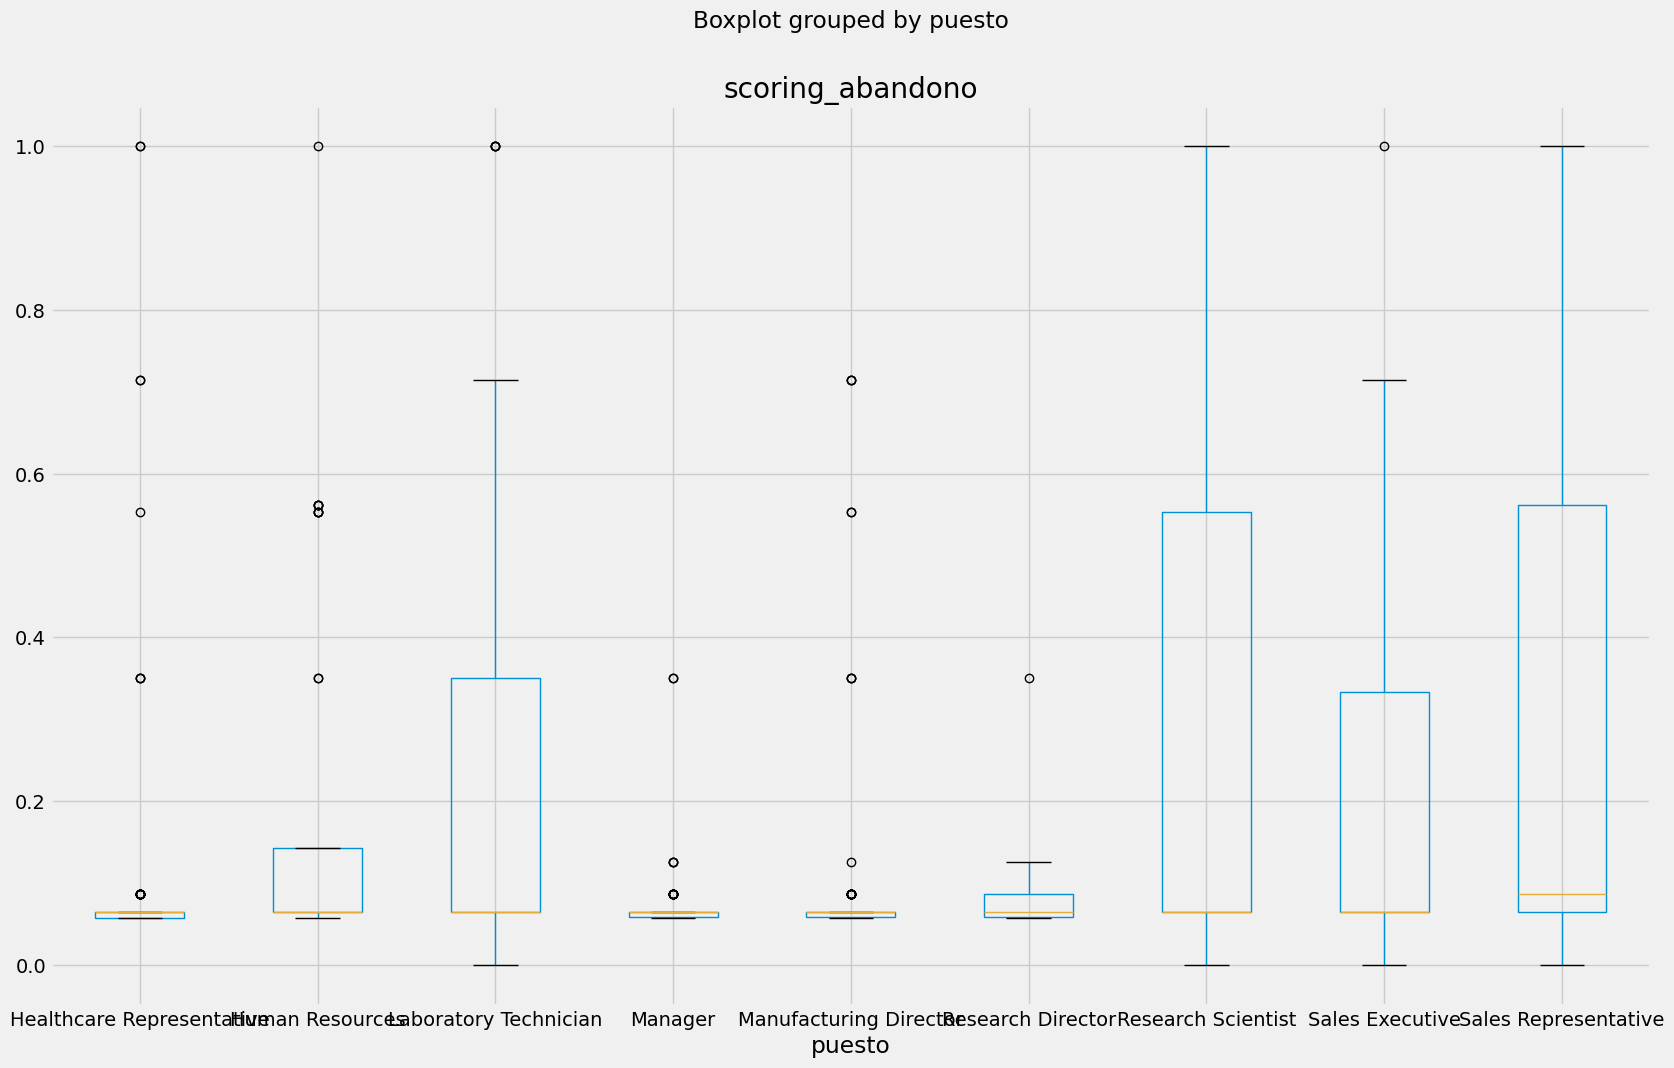

In [ ]:
df.boxplot(column='scoring_abandono', by='puesto', figsize = (20,12));

### GUARDAR EL RESULTADO

In [ ]:
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Baja,0,8,0,6,0,5,71916,14670.864,0.333333
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,1,10,3,10,1,7,61560,12558.240,0.064453
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,7,3,0,0,0,25080,4037.880,0.714286
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,0,8,3,8,3,0,34908,6876.876,0.561404
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Muy_Alta,1,6,3,2,2,2,41616,8198.352,0.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,1,17,3,5,0,3,30852,6077.844,0.064453
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Baja,1,9,5,7,1,7,119892,25177.320,0.064453
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Media,1,6,0,6,0,3,73704,15035.616,0.057143


In [ ]:
from google.colab import files

df.to_excel('abandono_con_scoring.xlsx')
files.download('abandono_con_scoring.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>